## Lista 1 - Mestrado EMAp 2017
### Thiago Trabach da Cunha


    

** Referência Bibliográfica: ** 
 - Learning from Data
 - Elements of Statistical Learning


** Colaboração: **

In [311]:
import numpy as np
from scipy import stats
import random
import math
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import pprint

%matplotlib inline

### <font color=firebrick> 1. Learning from Data, Problem 1.3</font>

** <font color=firebrick> a) </font> **

**<font color=firebrick> b) </font>**

### <font color=firebrick>  2. Learning from Data, Problem 1.5 </font>

In [312]:
def perceptron(w, x, y):
    
    #randomly select one observation
    k = random.choice(range(x.shape[1]))
    
    #verify if prediction is equal to the real value
    s = w.T * x[0:x.shape[0],k]
    
    if  y[0,k] *  s <= 0:
        w = w + x[0:x.shape[0],k]*y[0,k]
        
    return w

In [313]:
def perceptron_adaline(w, x, y, learning_rate):
    
    #randomly select one observation
    k = random.choice(range(x.shape[1]))
    
    #verify if prediction is equal to the real value
    s = w.T * x[0:x.shape[0],k]
    
    if y[0,k] * s <= 1:
        w = w + float(learning_rate * ( y[0,k] - s ) )* x[0:x.shape[0],k] 
        
    return w

** <font color=firebrick> a) </font>**

Generating training set

In [314]:
#sample paramenters
d = 2
n = 100


#generating fx
fx = np.matrix('0;' + str(np.random.uniform(-1,1,)) + ';' + str(np.random.uniform(-1,1)))

#generating sample
x = np.random.uniform(-1,1, [d,n])
x0 = np.ones((1,n))
x = np.matrix(np.vstack((x0, x)))

#generating the correct label
y = np.matrix(np.sign(fx.T*x))

Running Perceptron

100%|██████████| 1000/1000 [00:00<00:00, 15751.42it/s]


<function matplotlib.pyplot.show>

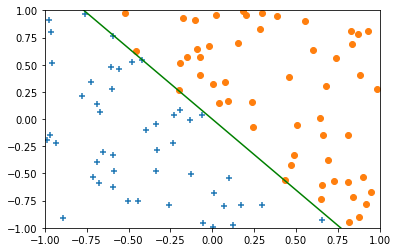

In [315]:
#PLA parameters
learning_rate = 100
max_steps = 1000

#finding gx
w = np.matrix(np.zeros((d + 1,1)))

for i in tqdm(range(max_steps)):
    w = perceptron_adaline(w,x,y, learning_rate)
    
    if np.matrix.all(y == np.sign(w.T*x)):

        break


        
###
#Ploting
###

#create variables for plotting
x_ar = np.array(x[1])
y_ar = np.array(x[2])

x_pos = x_ar[0][list(np.array(y[0] == 1)[0])]
y_pos = y_ar[0][list(np.array(y[0] == 1)[0])]

x_neg = x_ar[0][list(np.array(y[0] == -1)[0])]
y_neg = y_ar[0][list(np.array(y[0] == -1)[0])]


fx_x = np.arange(-5,5,0.01) * -float(fx[2]) #ortogonalizando fx para traçar a linha que separa as duas classificações
fx_y = np.arange(-5,5,0.01) * float(fx[1]) #ortogonalizando fx para traçar a linha que separa as duas classificações

gx_x = np.arange(-5,5,0.01) * -float(w[2]) #ortogonalizando gx para traçar a linha que separa as duas classificações
gx_y = np.arange(-5,5,0.01) * float(w[1]) #ortogonalizando gx para traçar a linha que separa as duas classificações


#define plot type and style
plt.scatter(x_pos, y_pos, marker='+')
plt.scatter(x_neg, y_neg, marker='o')
plt.plot(gx_x, gx_y, color = 'r')
plt.plot(fx_x, fx_y, color = 'g' )


#set axis range
plt.xlim(-1,1)
plt.ylim(-1,1)


#plot
plt.show

Calculating test error

In [316]:
#sample paramenters
d = 2
n = 10**4

#generating sample
x_test = np.random.uniform(-1,1, [d,n])
x0_test = np.ones((1,n))
x_test = np.matrix(np.vstack((x0_test, x_test)))

#generating the correct label
y_test = np.matrix(np.sign(fx.T*x_test))
y_hat_test = np.matrix(np.sign(w.T*x_test))

tset_error_100 = 1 - np.sum(y_test == y_hat_test)/n

print('Test set error = {0:10.2f}%'.format(tset_error_100*100,2))



Test set error =      74.79%


** <font color=firebrick> b) </font>**

Running Percepetron

  0%|          | 0/1000 [00:00<?, ?it/s]


<function matplotlib.pyplot.show>

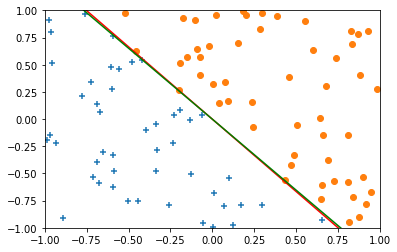

In [317]:
#PLA parameters
learning_rate = 1
max_steps = 1000

#finding gx
w = np.matrix(np.zeros((d + 1,1)))

for i in tqdm(range(max_steps)):
    w = perceptron_adaline(w,x,y, learning_rate)
    
    if np.matrix.all(y == np.sign(w.T*x)):

        break


        
###
#Ploting
###

#create variables for plotting
x_ar = np.array(x[1])
y_ar = np.array(x[2])

x_pos = x_ar[0][list(np.array(y[0] == 1)[0])]
y_pos = y_ar[0][list(np.array(y[0] == 1)[0])]

x_neg = x_ar[0][list(np.array(y[0] == -1)[0])]
y_neg = y_ar[0][list(np.array(y[0] == -1)[0])]


fx_x = np.arange(-5,5,0.01) * -float(fx[2]) #ortogonalizando fx para traçar a linha que separa as duas classificações
fx_y = np.arange(-5,5,0.01) * float(fx[1]) #ortogonalizando fx para traçar a linha que separa as duas classificações

gx_x = np.arange(-5,5,0.01) * -float(w[2]) #ortogonalizando gx para traçar a linha que separa as duas classificações
gx_y = np.arange(-5,5,0.01) * float(w[1]) #ortogonalizando gx para traçar a linha que separa as duas classificações


#define plot type and style
plt.scatter(x_pos, y_pos, marker='+')
plt.scatter(x_neg, y_neg, marker='o')
plt.plot(gx_x, gx_y, color = 'r')
plt.plot(fx_x, fx_y, color = 'g' )


#set axis range
plt.xlim(-1,1)
plt.ylim(-1,1)


#plot
plt.show

Calculating test error

In [318]:
#sample paramenters
d = 2
n = 10**4

#generating sample
x_test = np.random.uniform(-1,1, [d,n])
x0_test = np.ones((1,n))
x_test = np.matrix(np.vstack((x0_test, x_test)))

#generating the correct label
y_test = np.matrix(np.sign(fx.T*x_test))
y_hat_test = np.matrix(np.sign(w.T*x_test))

tset_error_1 = 1 - np.sum(y_test == y_hat_test)/n

print('Test set error = {0:10.2f}%'.format(tset_error_1*100,2))



Test set error =       0.37%


** <font color=firebrick> c) </font>**

Running Percepetron

100%|██████████| 1000/1000 [00:00<00:00, 14127.09it/s]


<function matplotlib.pyplot.show>

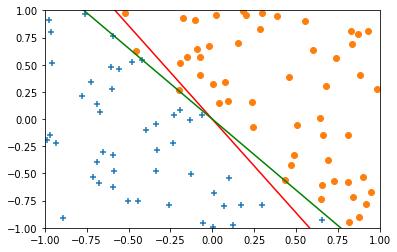

In [319]:
#PLA parameters
learning_rate = 0.01
max_steps = 1000

#finding gx
w = np.matrix(np.zeros((d + 1,1)))

for i in tqdm(range(max_steps)):
    w = perceptron_adaline(w,x,y, learning_rate)
    
    if np.matrix.all(y == np.sign(w.T*x)):

        break


        
###
#Ploting
###

#create variables for plotting
x_ar = np.array(x[1])
y_ar = np.array(x[2])

x_pos = x_ar[0][list(np.array(y[0] == 1)[0])]
y_pos = y_ar[0][list(np.array(y[0] == 1)[0])]

x_neg = x_ar[0][list(np.array(y[0] == -1)[0])]
y_neg = y_ar[0][list(np.array(y[0] == -1)[0])]


fx_x = np.arange(-5,5,0.01) * -float(fx[2]) #ortogonalizando fx para traçar a linha que separa as duas classificações
fx_y = np.arange(-5,5,0.01) * float(fx[1]) #ortogonalizando fx para traçar a linha que separa as duas classificações

gx_x = np.arange(-5,5,0.01) * -float(w[2]) #ortogonalizando gx para traçar a linha que separa as duas classificações
gx_y = np.arange(-5,5,0.01) * float(w[1]) #ortogonalizando gx para traçar a linha que separa as duas classificações


#define plot type and style
plt.scatter(x_pos, y_pos, marker='+')
plt.scatter(x_neg, y_neg, marker='o')
plt.plot(gx_x, gx_y, color = 'r')
plt.plot(fx_x, fx_y, color = 'g' )


#set axis range
plt.xlim(-1,1)
plt.ylim(-1,1)


#plot
plt.show

Calculating test error

In [320]:
#sample paramenters
d = 2
n = 10**4

#generating sample
x_test = np.random.uniform(-1,1, [d,n])
x0_test = np.ones((1,n))
x_test = np.matrix(np.vstack((x0_test, x_test)))

#generating the correct label
y_test = np.matrix(np.sign(fx.T*x_test))
y_hat_test = np.matrix(np.sign(w.T*x_test))


tset_error_001 = 1 - np.sum(y_test == y_hat_test)/n

print('Test set error = {0:10.2f}%'.format(tset_error_001*100,2))



Test set error =       5.23%


** <font color=firebrick>  d) </font>**

Running Percepetron

100%|██████████| 1000/1000 [00:00<00:00, 12879.63it/s]


<function matplotlib.pyplot.show>

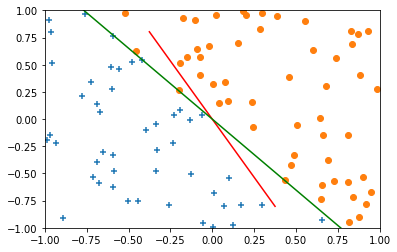

In [321]:
#PLA parameters
learning_rate = 0.0001
max_steps = 1000

#finding gx
w = np.matrix(np.zeros((d + 1,1)))

for i in tqdm(range(max_steps)):
    w = perceptron_adaline(w,x,y, learning_rate)
    
    if np.matrix.all(y == np.sign(w.T*x)):

        break


        
###
#Ploting
###

#create variables for plotting
x_ar = np.array(x[1])
y_ar = np.array(x[2])

x_pos = x_ar[0][list(np.array(y[0] == 1)[0])]
y_pos = y_ar[0][list(np.array(y[0] == 1)[0])]

x_neg = x_ar[0][list(np.array(y[0] == -1)[0])]
y_neg = y_ar[0][list(np.array(y[0] == -1)[0])]


fx_x = np.arange(-5,5,0.01) * -float(fx[2]) #ortogonalizando fx para traçar a linha que separa as duas classificações
fx_y = np.arange(-5,5,0.01) * float(fx[1]) #ortogonalizando fx para traçar a linha que separa as duas classificações

gx_x = np.arange(-20,20,0.01) * -float(w[2]) #ortogonalizando gx para traçar a linha que separa as duas classificações
gx_y = np.arange(-20,20,0.01) * float(w[1]) #ortogonalizando gx para traçar a linha que separa as duas classificações


#define plot type and style
plt.scatter(x_pos, y_pos, marker='+')
plt.scatter(x_neg, y_neg, marker='o')
plt.plot(gx_x, gx_y, color = 'r')
plt.plot(fx_x, fx_y, color = 'g' )


#set axis range
plt.xlim(-1,1)
plt.ylim(-1,1)


#plot
plt.show

Calculating test error

In [322]:
#sample paramenters
d = 2
n = 10**4

#generating sample
x_test = np.random.uniform(-1,1, [d,n])
x0_test = np.ones((1,n))
x_test = np.matrix(np.vstack((x0_test, x_test)))

#generating the correct label
y_test = np.matrix(np.sign(fx.T*x_test))
y_hat_test = np.matrix(np.sign(w.T*x_test))

tset_error_000001 = 1 - np.sum(y_test == y_hat_test)/n

print('Test set error = {0:10.2f}%'.format(tset_error_000001*100,2))



Test set error =      12.40%


**<font color=firebrick> e) </font>**

In [323]:
print('TEST SET ERRROR')
print()
print('LR: 0.00001 = {0:10.2f}%'.format(tset_error_000001*100,2))
print('LR: 0.01 = {0:10.2f}%'.format(tset_error_001*100,2))
print('LR: 1 = {0:10.2f}%'.format(tset_error_1*100,2))
print('LR: 100 = {0:10.2f}%'.format(tset_error_100*100,2))

TEST SET ERRROR

LR: 0.00001 =      12.40%
LR: 0.01 =       5.23%
LR: 1 =       0.37%
LR: 100 =      74.79%


Observamos que o Learning Rate = 1 obtém o melhor resultado nessa amostra. Rodando repetidamente o experimento verificamos que, consistentemente, LR = 1 tem o melhor resultado, seguido por LR = 0.01, LR = 0.00001 e LR = 1000.

### <font color=firebrick>  3. Learning from Data, Problem 2.19 </font>